In [241]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh

In [242]:
cols = []
for point in range(39):
    for num in ("x", "y", "z"):
        cols.append("p" + "%02d" % point + "_" + num)
cols = cols + ["label"]

In [244]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    shear_range=10
)

In [243]:
sel_drowsy_coord = pd.DataFrame(columns=cols)

drowsy_path = ("../../../Datasets/Drowsy/")
drowsy_files = os.listdir(drowsy_path)

sel_drowsy_files = random.sample(drowsy_files, int(len(drowsy_files) * 0.5))
sel_drowsy_files

['d_14357.png',
 'd_16701.png',
 'd_07443.png',
 'd_09401.png',
 'd_06836.png',
 'd_14699.png',
 'd_25087.png',
 'd_00368.png',
 'd_09860.png',
 'd_10686.png',
 'd_24627.png',
 'd_22004.png',
 'd_09841.png',
 'd_09654.png',
 'd_09075.png',
 'd_17904.png',
 'd_00298.png',
 'd_05730.png',
 'd_17519.png',
 'd_26439.png',
 'd_05180.png',
 'd_10106.png',
 'd_09990.png',
 'd_22607.png',
 'd_16257.png',
 'd_18878.png',
 'd_16193.png',
 'd_23276.png',
 'd_10986.png',
 'd_01325.png',
 'd_05169.png',
 'd_01406.png',
 'd_00347.png',
 'd_00928.png',
 'd_26155.png',
 'd_08795.png',
 'd_21094.png',
 'd_15214.png',
 'd_01059.png',
 'd_24072.png',
 'd_01816.png',
 'd_01364.png',
 'd_20617.png',
 'd_06319.png',
 'd_22157.png',
 'd_09018.png',
 'd_23299.png',
 'd_24920.png',
 'd_00894.png',
 'd_20872.png',
 'd_04067.png',
 'd_01777.png',
 'd_08156.png',
 'd_21665.png',
 'd_15048.png',
 'd_19369.png',
 'd_02759.png',
 'd_15308.png',
 'd_23539.png',
 'd_14496.png',
 'd_14353.png',
 'd_26321.png',
 'd_0662

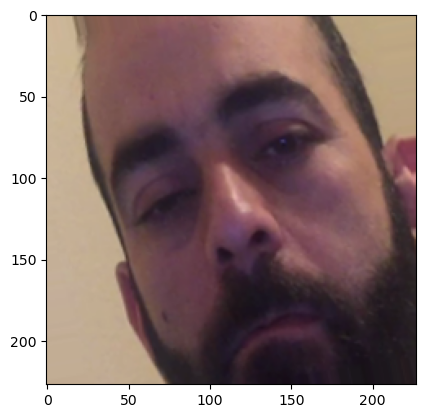

In [253]:
img = cv2.cvtColor(cv2.imread(drowsy_path + random.choice(drowsy_files)), cv2.COLOR_BGR2RGB)
img = np.expand_dims(img,axis=0)


train_datagen.fit(img)

data_gen_iter = train_datagen.flow(img)
aug_image_batch = next(data_gen_iter)
aug_image = np.squeeze(aug_image_batch)
aug_image = aug_image.astype('int')
plt.imshow(aug_image)

In [255]:
with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    for index, file_name in enumerate(sel_drowsy_files):
        image = cv2.cvtColor(cv2.imread(drowsy_path + file_name), cv2.COLOR_BGR2RGB)
        image = np.expand_dims(image,axis=0)
        
        data_gen_iter = train_datagen.flow(image)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('uint8')

        aug_image.flags.writeable = False
        results = face_mesh.process(aug_image)
        aug_image.flags.writeable = True
        aug_image = cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            fls = results.multi_face_landmarks[0]
            point_list = [fls.landmark[46], fls.landmark[53], fls.landmark[52], fls.landmark[55], fls.landmark[65],
                          
                          fls.landmark[276], fls.landmark[283], fls.landmark[282], fls.landmark[295], fls.landmark[285],
                          
                          fls.landmark[130], fls.landmark[160], fls.landmark[158], fls.landmark[133], fls.landmark[153], fls.landmark[144],
                          
                          fls.landmark[359], fls.landmark[387], fls.landmark[385], fls.landmark[362], fls.landmark[380], fls.landmark[373],
                          
                          fls.landmark[168], fls.landmark[6], fls.landmark[195], fls.landmark[4],
                          
                          fls.landmark[61],  fls.landmark[39], fls.landmark[0], fls.landmark[269], fls.landmark[291], fls.landmark[405], fls.landmark[17], fls.landmark[181],

                          fls.landmark[234], fls.landmark[132], fls.landmark[152], fls.landmark[288], fls.landmark[454]]
            
            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp.append(1)
            
            sel_drowsy_coord.loc[index] = temp
            if index % 100 == 0:
                print(index)

0
100
200
500
600
700
800
900
1000
1400
1500
1600
1700
1900
2000
2100
2200
2300
2400
2500
2700
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4600
4700
4800
4900
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8900
9000
9100
9300
9400
9600
9700
9800
9900
10000
10100
10200
10400
10600
10700
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12200
12400
12700
12800
13000
13100
13200
13300
13400


In [258]:
sel_drowsy_coord

,p00_x,p00_y,p00_z,p01_x,p01_y,p01_z,p02_x,p02_y,p02_z,p03_x,...,p36_x,p36_y,p36_z,p37_x,p37_y,p37_z,p38_x,p38_y,p38_z,label
0,0.139253,0.389434,0.057662,0.145025,0.358257,0.028266,0.172909,0.333917,-0.000696,0.314937,...,0.670321,0.957173,0.031385,0.896171,0.574634,0.225234,0.824010,0.305967,0.256867,1.0
1,0.181986,0.357239,0.088812,0.209263,0.315414,0.073316,0.251979,0.287045,0.056934,0.399762,...,0.576532,1.035342,-0.140089,0.840056,0.803272,0.213129,0.830813,0.540883,0.356724,1.0
3,0.517682,0.537178,0.023033,0.527647,0.528843,0.012517,0.540473,0.529627,0.003504,0.575851,...,0.528513,0.900123,-0.004410,0.652226,0.859020,0.075121,0.689106,0.744611,0.094406,1.0
5,0.163828,0.378986,0.061982,0.181413,0.340261,0.032510,0.215647,0.311878,0.004405,0.355504,...,0.604076,0.988335,0.000094,0.878224,0.660573,0.252296,0.843526,0.394303,0.307156,1.0
6,0.156749,0.374758,0.017033,0.175180,0.352331,-0.022658,0.214213,0.338679,-0.055647,0.372039,...,0.571662,0.993844,0.102908,0.883759,0.647210,0.328362,0.881583,0.389296,0.321664,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13448,0.268049,0.242808,0.125368,0.302590,0.228998,0.083555,0.349094,0.234907,0.043920,0.480237,...,0.275803,0.961068,-0.035124,0.765699,0.918773,0.263912,0.919672,0.710223,0.348506,1.0
13449,0.353195,0.361170,-0.084230,0.360665,0.338724,-0.101265,0.376835,0.327575,-0.106904,0.456466,...,0.608797,1.005569,0.087518,0.799364,0.698400,0.327356,0.766186,0.432293,0.339079,1.0
13451,0.365426,0.225095,0.075837,0.405104,0.203253,0.057836,0.448331,0.200961,0.035799,0.546042,...,0.285675,0.941355,-0.032189,0.648655,0.863286,0.180810,0.801173,0.654113,0.258878,1.0
13452,0.224182,0.185614,0.104677,0.278197,0.180023,0.071735,0.342034,0.196737,0.040070,0.495138,...,0.226542,0.922854,-0.099088,0.686312,0.958253,0.349645,0.845406,0.790171,0.489261,1.0


In [259]:
sel_drowsy_coord.to_csv('./csv/aug_drowsy_39_Points.csv', index=False, encoding='utf-8-sig')

# Non-Drowsy

In [264]:
sel_non_drowsy_coord = pd.DataFrame(columns=cols)

non_drowsy_path = ("../../../Datasets/Non-Drowsy/")
non_drowsy_files = os.listdir(non_drowsy_path)

sel_non_drowsy_files = random.sample(non_drowsy_files, int(len(non_drowsy_files) * 0.5))
len(sel_non_drowsy_files)

12002

In [265]:
with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    for index, file_name in enumerate(sel_non_drowsy_files):
        image = cv2.cvtColor(cv2.imread(non_drowsy_path + file_name), cv2.COLOR_BGR2RGB)
        image = np.expand_dims(image,axis=0)
        
        data_gen_iter = train_datagen.flow(image)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('uint8')

        aug_image.flags.writeable = False
        results = face_mesh.process(aug_image)
        aug_image.flags.writeable = True
        aug_image = cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            fls = results.multi_face_landmarks[0]
            point_list = [fls.landmark[46], fls.landmark[53], fls.landmark[52], fls.landmark[55], fls.landmark[65],
                          
                          fls.landmark[276], fls.landmark[283], fls.landmark[282], fls.landmark[295], fls.landmark[285],
                          
                          fls.landmark[130], fls.landmark[160], fls.landmark[158], fls.landmark[133], fls.landmark[153], fls.landmark[144],
                          
                          fls.landmark[359], fls.landmark[387], fls.landmark[385], fls.landmark[362], fls.landmark[380], fls.landmark[373],
                          
                          fls.landmark[168], fls.landmark[6], fls.landmark[195], fls.landmark[4],
                          
                          fls.landmark[61],  fls.landmark[39], fls.landmark[0], fls.landmark[269], fls.landmark[291], fls.landmark[405], fls.landmark[17], fls.landmark[181],

                          fls.landmark[234], fls.landmark[132], fls.landmark[152], fls.landmark[288], fls.landmark[454]]
            
            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp.append(1)
            
            sel_non_drowsy_coord.loc[index] = temp
            if index % 100 == 0:
                print(index)

0
100
200
300
400
500
700
900
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2700
2800
2900
3000
3300
3400
3500
3700
3800
3900
4000
4100
4300
4500
4600
4800
5000
5100
5200
5300
5400
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6700
6800
6900
7000
7100
7200
7400
7700
7800
7900
8000
8100
8200
8300
8400
8500
8700
8900
9000
9100
9200
9500
9600
9800
9900
10000
10100
10200
10300
10400
10500
10700
10800
11000
11100
11200
11500
11600
11700
11800
12000


In [266]:
sel_non_drowsy_coord.to_csv('./csv/aug_non-drowsy_39_Points.csv', index=False, encoding='utf-8-sig')